In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from scipy.stats import zscore
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression

In [168]:
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm

In [64]:
import seaborn as sns

In [65]:
os.chdir("D:\Data Science Engineering Great lakes of Institute of management\Supervised Learning Regression")

In [66]:
dataset=pd.read_csv("Train_Bigmart.csv")
dataset_test=pd.read_csv("Test_Bigmart.csv")

In [67]:
dataset.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [68]:
dataset.shape

(8523, 12)

In [69]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [70]:
dataset.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

# Continous Variables           
Item_Weight
Item_Visibility
Item_MRP
Outlet_Establishment_Year
Item_Outlet_Sales             
# Categorical Variables
Item_Identifier
Item_Fat_Content
Item_Type
Outlet_Identifier
Outlet_Size
Outlet_Location_Type
Outlet_Type

In [71]:
for i in dataset.columns:
    if dataset[i].dtype!='object':
        print(i)

Item_Weight
Item_Visibility
Item_MRP
Outlet_Establishment_Year
Item_Outlet_Sales


In [72]:
for i in dataset.columns:
    if dataset[i].dtype=='object':
        print(i)

Item_Identifier
Item_Fat_Content
Item_Type
Outlet_Identifier
Outlet_Size
Outlet_Location_Type
Outlet_Type


# Explorative Data analysis

# Univarient Analysis

In [73]:
def continous_data(i):
    if dataset[i].dtype!='object':
        sns.boxplot(dataset[i])
        plt.title("Boxplot---"+str(i))
        plt.show()
        print('--'*200)
        plt.title("histogram---"+str(i))
        sns.set()
        dataset[i].plot.hist()
        plt.show()
        plt.clf()
    

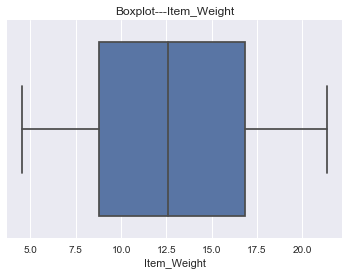

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


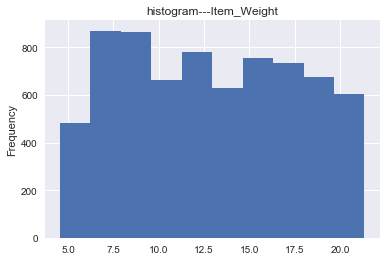

In [74]:
continous_data(i='Item_Weight')

In [75]:
def categorical_data(i):
    dataset[i].value_counts().plot(kind='bar')

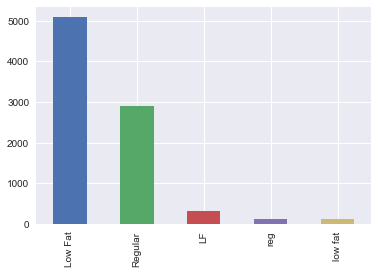

In [76]:
categorical_data(i='Item_Fat_Content')

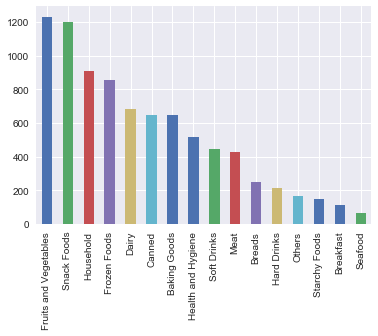

In [77]:
categorical_data(i='Item_Type')

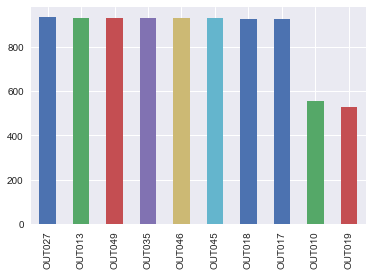

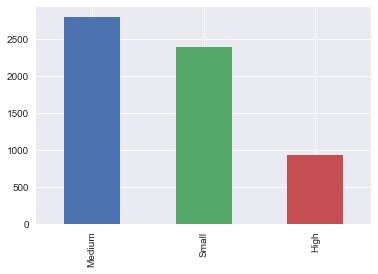

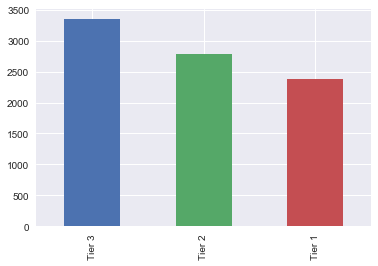

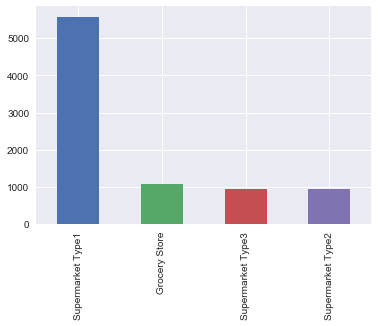

In [78]:
a=['Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']
for j in a:
    categorical_data(i=j)
    plt.show()

# Multivarient Analysis

In [79]:
a=dataset.corr()
a

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


In [80]:
a[a>0.50]

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.0,NaN,NaN,NaN,NaN
Item_Visibility,NaN,1.0,NaN,NaN,NaN
Item_MRP,NaN,NaN,1.000000,NaN,0.567574
Outlet_Establishment_Year,NaN,NaN,NaN,1.0,NaN
Item_Outlet_Sales,NaN,NaN,0.567574,NaN,1.000000


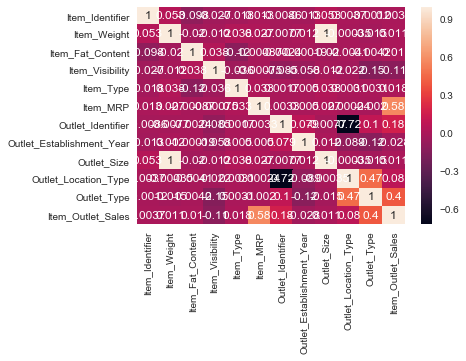

In [171]:
sns.heatmap(dataset.corr(), annot=True)

In [81]:
def scatterplot(i,j):
    sns.regplot(data=dataset,x=i,y=j)
    plt.show()

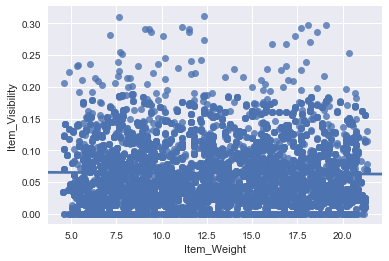

In [82]:
scatterplot(i='Item_Weight',j='Item_Visibility')

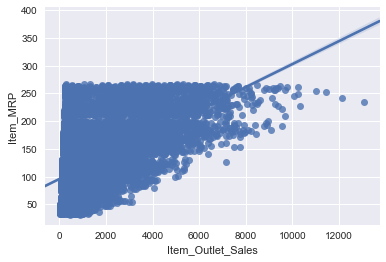

In [83]:
scatterplot(i='Item_Outlet_Sales',j='Item_MRP')

In [84]:
def categorical_multi(i,j):
    pd.crosstab(dataset[i],dataset[j]).plot(kind='bar')
    plt.show()
    print(pd.crosstab(dataset[i],dataset[j]))

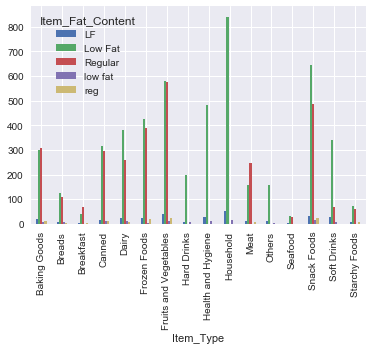

Item_Fat_Content       LF  Low Fat  Regular  low fat  reg
Item_Type                                                
Baking Goods           20      301      306        8   13
Breads                  8      126      108        6    3
Breakfast               2       39       67        0    2
Canned                 17      314      297       10   11
Dairy                  24      382      258       12    6
Frozen Foods           22      424      387        4   19
Fruits and Vegetables  39      580      577       11   25
Hard Drinks             8      199        0        7    0
Health and Hygiene     29      481        0       10    0
Household              54      840        0       16    0
Meat                   10      159      248        1    7
Others                 11      156        0        2    0
Seafood                 4       32       27        1    0
Snack Foods            31      645      485       16   23
Soft Drinks            28      339       70        7    1
Starchy Foods 

In [85]:
categorical_multi(i='Item_Type',j='Item_Fat_Content')

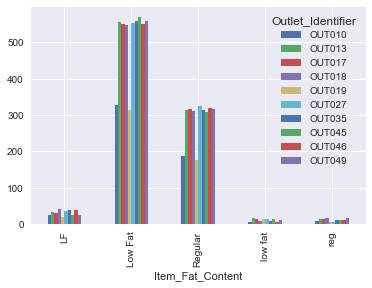

Outlet_Identifier  OUT010  OUT013  OUT017  OUT018  OUT019  OUT027  OUT035  \
Item_Fat_Content                                                            
LF                     26      32      31      42      19      37      38   
Low Fat               328     556     550     547     314     553     559   
Regular               187     313     317     312     177     324     314   
low fat                 5      18      13       9      13      15       9   
reg                     9      13      15      18       5       6      10   

Outlet_Identifier  OUT045  OUT046  OUT049  
Item_Fat_Content                           
LF                     26      39      26  
Low Fat               570     552     560  
Regular               309     320     316  
low fat                13       7      10  
reg                    11      12      18  


In [86]:
categorical_multi(i='Item_Fat_Content',j='Outlet_Identifier')

# Handling Missing Values

In [87]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [88]:
dataset.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [89]:
dataset.loc[dataset['Item_Weight'].isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
36,FDV20,NaN,Regular,0.059512,Fruits and Vegetables,128.0678,OUT027,1985,Medium,Tier 3,Supermarket Type3,2797.6916
38,FDX10,NaN,Regular,0.123111,Snack Foods,36.9874,OUT027,1985,Medium,Tier 3,Supermarket Type3,388.1614
39,FDB34,NaN,Low Fat,0.026481,Snack Foods,87.6198,OUT027,1985,Medium,Tier 3,Supermarket Type3,2180.4950
49,FDS02,NaN,Regular,0.255395,Dairy,196.8794,OUT019,1985,Small,Tier 1,Grocery Store,780.3176
59,FDI26,NaN,Low Fat,0.061082,Canned,180.0344,OUT019,1985,Small,Tier 1,Grocery Store,892.1720


In [90]:
c=dataset.groupby(['Item_Fat_Content','Item_Type']).Item_Weight.median().unstack()


In [91]:
dataset["Item_Weight"] = dataset.groupby(['Item_Fat_Content','Item_Type']).transform(lambda x: x.fillna(x.median()))

In [92]:
dataset.loc[dataset['Item_Weight'].isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [93]:
dataset['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [94]:
dataset.loc[dataset['Outlet_Size'].notnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.9200,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.5000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.9300,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.3950,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.6500,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,14.1000,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
10,FDY07,11.8000,Low Fat,0.000000,Fruits and Vegetables,45.5402,OUT049,1999,Medium,Tier 1,Supermarket Type1,1516.0266
11,FDA03,18.5000,Regular,0.045464,Dairy,144.1102,OUT046,1997,Small,Tier 1,Supermarket Type1,2187.1530
12,FDX32,15.1000,Regular,0.100014,Fruits and Vegetables,145.4786,OUT049,1999,Medium,Tier 1,Supermarket Type1,1589.2646


In [95]:
dataset['Outlet_Size'].replace(['Medium', 'High', 'Small'],[1,2,0],inplace=True)

In [96]:
dataset["Outlet_Size"] = dataset.groupby(['Outlet_Identifier','Outlet_Location_Type','Outlet_Type']).transform(lambda x: x.fillna(x.median()))

In [97]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  8523 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  8523 non-null float64
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(5), int64(1), object(6)
memory usage: 799.1+ KB


# Imputation Techniques
from sklearn.preprocessing import Imputer
replace the nan values with mean()
replace the nan values with median()
replace the nan values with most_frequent()
replace the nan values with Interpolate()


# Treatment of Outliers

In [98]:
j=[]
for i in dataset.columns:
    if dataset[i].dtype!='object':
        j.append(i)

In [99]:
j

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Outlet_Size',
 'Item_Outlet_Sales']

In [100]:
for k in j:
    outliers_outer=np.mean(dataset[k])+2*np.std(dataset[k])
    outliers_inner=np.mean(dataset[k])-2*np.std(dataset[k])
    dataset[k]=np.where(dataset[k] >outliers_outer,outliers_outer,dataset[k])
    dataset[k]=np.where(dataset[k]<outliers_inner,outliers_inner,dataset[k])

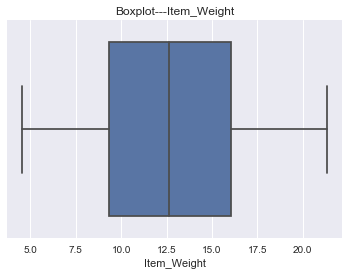

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


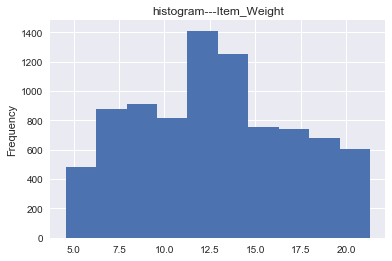

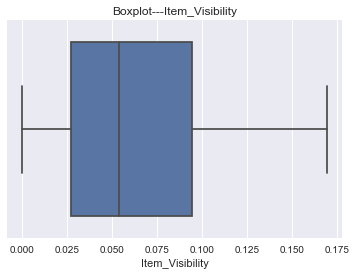

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


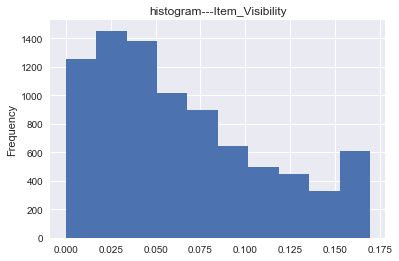

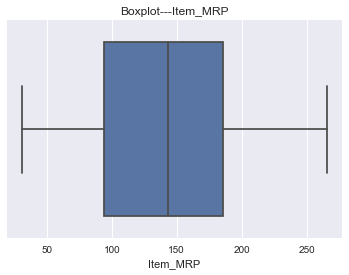

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


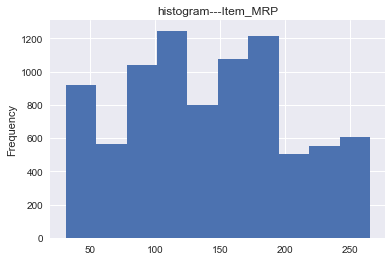

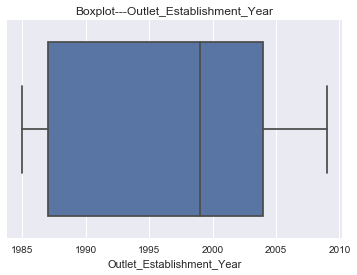

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


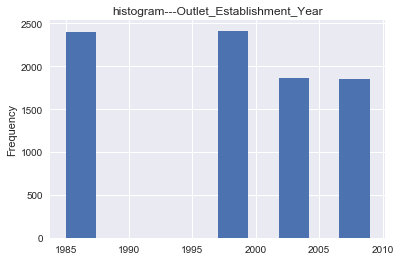

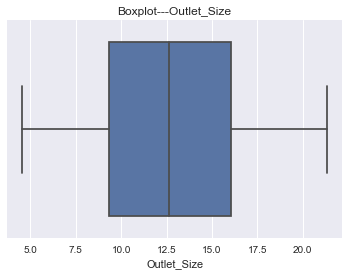

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


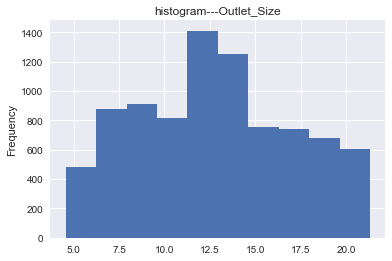

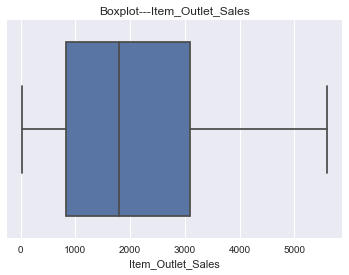

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


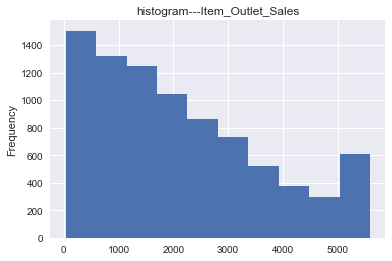

In [101]:
for k in j:
    continous_data(i=k)

# treatment techniques
replace the values with median
replace the values with mode
replace the values with mean
delete the values
using knn treating

In [102]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
Item_Identifier              5681 non-null object
Item_Weight                  4705 non-null float64
Item_Fat_Content             5681 non-null object
Item_Visibility              5681 non-null float64
Item_Type                    5681 non-null object
Item_MRP                     5681 non-null float64
Outlet_Identifier            5681 non-null object
Outlet_Establishment_Year    5681 non-null int64
Outlet_Size                  4075 non-null object
Outlet_Location_Type         5681 non-null object
Outlet_Type                  5681 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [103]:
dataset_test['Outlet_Size'].unique()

array(['Medium', nan, 'Small', 'High'], dtype=object)

In [104]:
dataset_test['Outlet_Size'].replace(['Medium', 'High', 'Small'],[1,2,0],inplace=True)

In [108]:
dataset_test["Outlet_Size"] = dataset_test.groupby(['Outlet_Identifier','Outlet_Location_Type','Outlet_Type']).transform(lambda x: x.fillna(x.median()))

In [109]:
dataset_test["Item_Weight"] = dataset_test.groupby(['Item_Fat_Content','Item_Type']).transform(lambda x: x.fillna(x.median()))

In [110]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
Item_Identifier              5681 non-null object
Item_Weight                  5680 non-null float64
Item_Fat_Content             5681 non-null object
Item_Visibility              5681 non-null float64
Item_Type                    5681 non-null object
Item_MRP                     5681 non-null float64
Outlet_Identifier            5681 non-null object
Outlet_Establishment_Year    5681 non-null int64
Outlet_Size                  5681 non-null float64
Outlet_Location_Type         5681 non-null object
Outlet_Type                  5681 non-null object
dtypes: float64(4), int64(1), object(6)
memory usage: 488.3+ KB


In [111]:
dataset_test.loc[dataset_test['Item_Weight'].isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
1284,FDD23,NaN,reg,0.04845,Starchy Foods,185.5898,OUT027,1985,12.3,Tier 3,Supermarket Type3


In [112]:
dataset_test["Item_Weight"] = dataset.groupby(['Item_Fat_Content','Item_Type']).transform(lambda x: x.fillna(x.median()))

# Creating Dummies for Categorical Variables

In [113]:
labels=LabelEncoder()
j=[]
for i in dataset.columns:
    if dataset[i].dtype=='object':
        j.append(i)
        
j

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Location_Type',
 'Outlet_Type']

In [114]:
for i in dataset.columns:
    if dataset[i].dtype=='object':
        dataset[i]=labels.fit_transform(dataset[i])
    if dataset_test[i].dtype=='object':
        dataset_test[i]=labels.fit_transform(dataset_test[i])

KeyError: 'Item_Outlet_Sales'

In [115]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
Item_Identifier              5681 non-null int32
Item_Weight                  5681 non-null float64
Item_Fat_Content             5681 non-null int32
Item_Visibility              5681 non-null float64
Item_Type                    5681 non-null int32
Item_MRP                     5681 non-null float64
Outlet_Identifier            5681 non-null int32
Outlet_Establishment_Year    5681 non-null int64
Outlet_Size                  5681 non-null float64
Outlet_Location_Type         5681 non-null int32
Outlet_Type                  5681 non-null int32
dtypes: float64(4), int32(6), int64(1)
memory usage: 355.1 KB


# Splitting the dataset


In [154]:
X=dataset.drop(['Item_Outlet_Sales'],axis=1)
y=dataset['Item_Outlet_Sales']
X_test=dataset_test.iloc[:,:]

# Scaling the dataset

In [169]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X=sc_X.fit_transform(X)
X_test=sc_X.fit_transform(X_test)

c:\users\hp 8.1\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\hp 8.1\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
c:\users\hp 8.1\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\hp 8.1\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


# fitting to the model through Ridge

In [126]:
regressor_ridge=Ridge(alpha=2)

In [127]:
regressor_ridge.fit(X,y)

Ridge(alpha=2, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [148]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
j=[]
for i in range(1,10):
    regressor_ridge=Ridge(alpha=i)
    regressor_ridge.fit(X_train,y_train)
    y_pred=regressor_ridge.predict(X_test)
    mae=mean_absolute_error(y_pred,y_test)
    j.append(mae)

In [149]:
print(j)
print(regressor_ridge.coef_)

[867.3800607937002, 867.4092087369957, 867.4488276896591, 867.4920975390295, 867.5461545810132, 867.600807158248, 867.651966957979, 867.7008585066895, 867.7468830321957]
[-1.29199449e-01  2.95970309e+01 -9.69856369e+02  3.58267787e-01
  1.43207855e+01  6.21732113e+01  2.14113526e+00 -1.29199449e-01
 -4.40548910e+01  7.67511968e+02]


In [128]:
y_pred=regressor_ridge.predict(X_test)

In [130]:
sample_submission=pd.DataFrame({'y_pred':y_pred})
sample_submission.to_csv("D:\Data Science Engineering Great lakes of Institute of management\kaggle Competitions\AnalyticsIndia--Bigmart/bigmart.csv")

# Fitting Model through Lasso

In [140]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
j=[]
k=[]
for i in range(1,10):
    regressor_Lasso=Lasso(alpha=i)
    regressor_Lasso.fit(X_train,y_train)
    y_pred=regressor_Lasso.predict(X_test)
    mae=mean_absolute_error(y_pred,y_test)
    j.append(mae)
    coef=regressor_ridge.coef_
    k.append(coef)

In [143]:
print(j)
print(k)

[867.3635761001595, 867.4090222255919, 867.4689578906207, 867.5403967291693, 867.6237062501069, 867.7115100326124, 867.8002977843487, 867.8925852171353, 867.9956081393369]
[array([ 8.12124779e-01, -6.54072049e-01,  2.00582989e+01, -7.37524580e+01,
        6.69588148e-01,  8.90539422e+02,  1.72109404e+02,  1.62185612e+01,
       -6.54072049e-01, -3.89722142e+01,  6.09471116e+02]), array([ 8.12124779e-01, -6.54072049e-01,  2.00582989e+01, -7.37524580e+01,
        6.69588148e-01,  8.90539422e+02,  1.72109404e+02,  1.62185612e+01,
       -6.54072049e-01, -3.89722142e+01,  6.09471116e+02]), array([ 8.12124779e-01, -6.54072049e-01,  2.00582989e+01, -7.37524580e+01,
        6.69588148e-01,  8.90539422e+02,  1.72109404e+02,  1.62185612e+01,
       -6.54072049e-01, -3.89722142e+01,  6.09471116e+02]), array([ 8.12124779e-01, -6.54072049e-01,  2.00582989e+01, -7.37524580e+01,
        6.69588148e-01,  8.90539422e+02,  1.72109404e+02,  1.62185612e+01,
       -6.54072049e-01, -3.89722142e+01,  6.094

In [156]:
regressor_Lasso=Lasso(alpha=2)
regressor_Lasso.fit(X,y)
y_pred1=regressor_Lasso.predict(X_test)
sample_submission=pd.DataFrame({'y_pred':y_pred1})
sample_submission.to_csv("D:\Data Science Engineering Great lakes of Institute of management\kaggle Competitions\AnalyticsIndia--Bigmart/bigmart.csv")

# Multiple Regression Backward Elimination

In [157]:
def forward_selected(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = ols(formula, data).fit()
    return model

In [158]:
model = forward_selected(dataset, 'Item_Outlet_Sales')

In [159]:
print(model.model.formula)

Item_Outlet_Sales ~ Item_MRP + Outlet_Type + Outlet_Identifier + Item_Visibility + Item_Fat_Content + Outlet_Location_Type + 1


In [160]:
print(model.rsquared_adj)

0.5129505030675601


In [161]:
model1=ols('Item_Outlet_Sales ~ Item_MRP + Outlet_Type + Outlet_Identifier + Item_Visibility + Item_Fat_Content + Outlet_Location_Type + 1',data=dataset).fit()

In [162]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     1497.
Date:                Sun, 02 Dec 2018   Prob (F-statistic):               0.00
Time:                        11:40:20   Log-Likelihood:                -71644.
No. Observations:                8523   AIC:                         1.433e+05
Df Residuals:                    8516   BIC:                         1.434e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             -998.5140     69.888    -14.287      0.000   -1135.512    -861.516
Item_MRP                14.3819      0.188     76.338      0.000      14.013      14.751
Outlet_Type            770.3620     23.527     32.743      0.000     724.243     816.481
Outlet_Identifier       60.0548      8.355      7.188      0.000      43.677      76.433
Item_Visibility      -1566.3937    252.285     -6.209      0.000   -2060.934   -1071.853
Item_Fat_Content        35.0380     18.207      1.924      0.054      -0.653      70.729
Outlet_Location_Type   -52.8447     32.785     -1.612      0.107    -117.112      11.423
==============================================================================
Omnibus:                       57.134   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.767
Skew:                           0.189   Prob(JB):                     1.73e-13
Kurtosis:                       3.150   Cond. No.                     3.33e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.33e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [164]:
y_pred3=model1.predict(X_test)

In [165]:
sample_submission=pd.DataFrame({'y_pred':y_pred3})
sample_submission.to_csv("D:\Data Science Engineering Great lakes of Institute of management\kaggle Competitions\AnalyticsIndia--Bigmart/bigmart.csv")

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
                
        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

result = stepwise_selection(X, y)

print('resulting features:')
print(result)